Exemplo 1
=========

 Neste exemplo usaremos um conjunto de dados de exemplo chamado *digits*, composta por 1797 imagens de dígitos de tamanho 16x16 digitalizadas e preprocessadas, disponível na biblioteca [scikit-learn](http://scikit-learn.org/). Para saber mais sobre os dados consulte [a documentação](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html).

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
print("Numero de imagens:", len(digits.images))

('Numero de imagens:', 1797)


Visualizando os dados
---------------------

Para termos uma ideia do que estamos trabalhando, é sempre bom fazer uma análise exploratória
dos dados **antes** de aplicar algoritmos de *machine learning*. Para termos uma ideia de como são
os dados veja o exemplo abaixo.

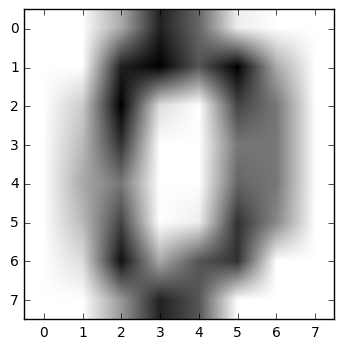

('Class:', 0)


In [9]:
import matplotlib.pyplot as plt

# Imprime a figura de exemplo
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.show()
# Imprime a saída correspondente à figura de exemplo
print("Class:", digits.target[0])

Aplicando um algorítmo de ML
----------------------------

Finalmente, vamos ao nosso primeiro exemplo. Usaremos um classificador chamado 
**SVM** (*Support Vector Machine*) para tentar montar um modelo que dado um dígito 
escrito a mão na entrada, preveja qual é número correspondente

In [34]:
# Modelo de classificação com SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 
svm = SVC(kernel='linear')

x_train = digits.data[:1000]
y_train = digits.target[:1000]

# Treinamento (com 1000 imagens)
svm.fit(x_train, y_train)

# Testes (com 797 imagens)
x_test = digits.data[1000:]
y_predicted = svm.predict(x_test)
y_expected = digits.target[1000:]

print(classification_report(y_expected, y_predicted))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97        79
          1       0.96      0.89      0.92        80
          2       1.00      0.99      0.99        77
          3       0.97      0.84      0.90        79
          4       1.00      0.94      0.97        83
          5       0.89      0.99      0.94        82
          6       0.98      0.99      0.98        80
          7       0.94      0.95      0.94        80
          8       0.87      0.93      0.90        76
          9       0.88      0.93      0.90        81

avg / total       0.94      0.94      0.94       797

0.942283563363


O que é uma SVM?
----------------

Por ora não precisamos saber detalhes, mas uma explicação rápida é a seguinte: 
Vamos imaginar um conjunto  de dados com apenas duas dimensoes de entrada (x1 e x2) e com duas classes
(azul e vermelha) como o da figura abaixo. 
Uma SVM é capaz de encontrar uma reta que separa o conjunto com a maior distância
média possível entre os pontos da fronteira das duas classes. 

![title](img/svm.png)

Isto também funciona com um número maior de entradas, como no nosso exemplo, em que temos
16x16=256 entradas, mas a separação deixa de ser um plano e passa a ser o que chamamos de 
hiperplano em 255 dimensões. 

Para mais detalhes, consulte:

Obs: está e uma explicação para uma SVM com kernel linear, como a que usamos neste
exemplo. Outros tipos existem e a diferença básica entre eles é que ao invés de
um hiperplano, outros modelos geram estruturas geométricas diferentes, que podem
ser mais úteis em certos problemas.

Exercício 1.1: Random Forests
-----------------------------

Reproduza o primeiro exemplo usando o classificador por *random forests*,
você pode variar o número de árvores de decisão usadas pelo parâmetro `n_estimators`
e tentar melhorar a precisão do algorítmo.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

O que é uma Random Forest?
--------------------------

Resumindo, um algoritmo de *Random Forest* divide os dados em N grupos e monta N
árvores de decisão para cada grupo. Ao final, o resultado das várias árvores é
combinado para gerar a resposta final.

A informação está nos dados 
---------------------------

Menos dados pode significar uma precisão pior, já que a informação do
nosso modelo está nos dados, e não diretamente no algoritmo empregado.
Mas isso nem sempre é verdade, pois o nosso algoritmo pode ter limitações.

In [38]:
# A quantidada de de dados importa
svm = SVC(kernel='linear')

# Treinamento com 50 imagens
svm.fit(digits.data[:50], digits.target[:50])

# Testes
predicted = svm.predict(digits.data[1000:])
expected = digits.target[1000:]
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.86      0.99      0.92        79
          1       0.98      0.70      0.82        80
          2       0.96      0.83      0.89        77
          3       0.82      0.76      0.79        79
          4       0.99      0.94      0.96        83
          5       0.72      0.68      0.70        82
          6       0.94      0.93      0.93        80
          7       0.85      0.93      0.89        80
          8       0.67      0.76      0.71        76
          9       0.65      0.79      0.71        81

avg / total       0.84      0.83      0.83       797



Exercício 1.2: Rede Neural Perceptron
-------------------------------------

Vamos agora repetir o problema para uma rede neural do tipo *Perceptron*.
Também não vamos entrar em detalhes do algoritmo agora, mas podemos dizer
que ele é um algoritmo mais versátil que SVMs e *Random Forests*.

In [36]:
from sklearn.neural_network import MLPClassifier 

mlp = MLPClassifier(hidden_layer_sizes=(100))

Desafio: Melhorar a precisão
----------------------------

Não discutimos isto, mas os algoritmos utilizados tem parâmetros que permitem 
obter um modelo melhor. Busque na documentação os algoritmos utilizados 
(ou outros se preferir) e procure melhorar a precisão dos algoritmos.